<a href="https://colab.research.google.com/github/Enzo0501/MachineLearning/blob/main/AtividadePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Time        V1        V2        V3        V4        V5        V6  \
0   82450.0  1.314539  0.590643 -0.666593  0.716564  0.301978 -1.125467   
1   50554.0 -0.798672  1.185093  0.904547  0.694584  0.219041 -0.319295   
2   55125.0 -0.391128 -0.245540  1.122074 -1.308725 -0.639891  0.008678   
3  116572.0 -0.060302  1.065093 -0.987421 -0.029567  0.176376 -1.348539   
4   90434.0  1.848433  0.373364  0.269272  3.866438  0.088062  0.970447   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.388881 -0.288390 -0.132137  ... -0.170307 -0.429655 -0.141341 -0.200195   
1  0.495236  0.139269 -0.760214  ...  0.202287  0.578699 -0.092245  0.013723   
2 -0.701304 -0.027315 -2.628854  ... -0.133485  0.117403 -0.191748 -0.488642   
3  0.775644  0.134843 -0.149734  ...  0.355576  0.907570 -0.018454 -0.126269   
4 -0.721945  0.235983  0.683491  ...  0.103563  0.620954  0.197077  0.692392   

        V25       V26       V27       V28  Amount  Class  
0  0.6394

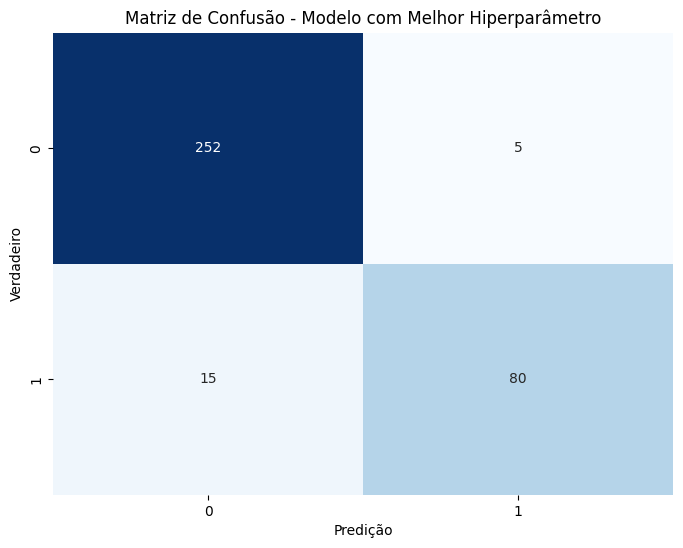

Acurácia (Ensemble): 0.9460227272727273
Relatório de Classificação (Ensemble):
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       257
           1       0.96      0.83      0.89        95

    accuracy                           0.95       352
   macro avg       0.95      0.91      0.93       352
weighted avg       0.95      0.95      0.94       352

Matriz de Confusão (Ensemble):
 [[254   3]
 [ 16  79]]


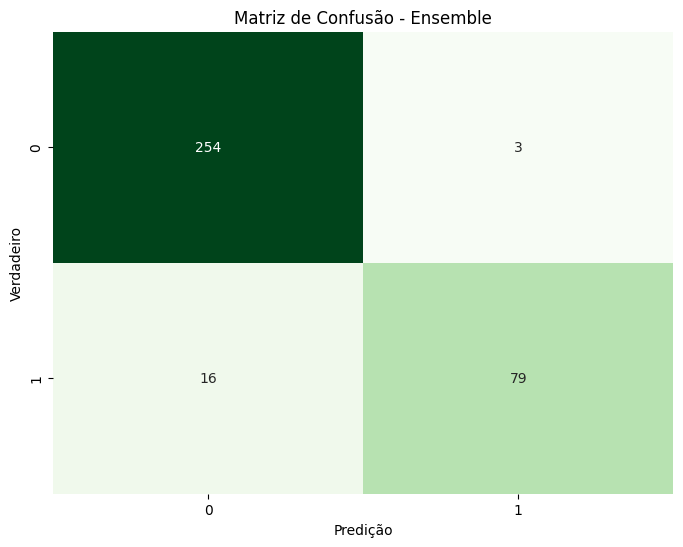

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/creditcard - menor balanceado.csv')
print(data.head())

X = data.drop('Class', axis=1)
y = data['Class']

print("Distribuição das classes:\n", y.value_counts())

select_k = SelectKBest(mutual_info_classif, k=10)
X_new = select_k.fit_transform(X, y)

smote = SMOTE(sampling_strategy='minority', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

pipeline = ImbPipeline([
    ('sampling', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Modelo com Melhor Hiperparâmetro")
plt.show()

ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier())
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

print("Acurácia (Ensemble):", accuracy_score(y_test, y_pred_ensemble))
print("Relatório de Classificação (Ensemble):\n", classification_report(y_test, y_pred_ensemble))
print("Matriz de Confusão (Ensemble):\n", confusion_matrix(y_test, y_pred_ensemble))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Ensemble")
plt.show()


In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/creditcard - menor balanceado.csv')
print(data.head())

X = data.drop('Class', axis=1)
y = data['Class']

print("Distribuição das classes:\n", y.value_counts())

select_k = SelectKBest(mutual_info_classif, k=10)
X_new = select_k.fit_transform(X, y)

smote = SMOTE(sampling_strategy='minority', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

pipeline = ImbPipeline([
    ('sampling', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])


param_grid = {
    'classifier__n_estimators': [100, 150, 200, 250],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Modelo com Melhor Hiperparâmetro")
plt.show()

ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=5, max_features='sqrt', random_state=42)),
    ('svc', SVC(C=0.1, gamma=0.01, probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

print("Acurácia (Ensemble):", accuracy_score(y_test, y_pred_ensemble))
print("Relatório de Classificação (Ensemble):\n", classification_report(y_test, y_pred_ensemble))
print("Matriz de Confusão (Ensemble):\n", confusion_matrix(y_test, y_pred_ensemble))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Ensemble")
plt.show()


       Time        V1        V2        V3        V4        V5        V6  \
0   82450.0  1.314539  0.590643 -0.666593  0.716564  0.301978 -1.125467   
1   50554.0 -0.798672  1.185093  0.904547  0.694584  0.219041 -0.319295   
2   55125.0 -0.391128 -0.245540  1.122074 -1.308725 -0.639891  0.008678   
3  116572.0 -0.060302  1.065093 -0.987421 -0.029567  0.176376 -1.348539   
4   90434.0  1.848433  0.373364  0.269272  3.866438  0.088062  0.970447   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.388881 -0.288390 -0.132137  ... -0.170307 -0.429655 -0.141341 -0.200195   
1  0.495236  0.139269 -0.760214  ...  0.202287  0.578699 -0.092245  0.013723   
2 -0.701304 -0.027315 -2.628854  ... -0.133485  0.117403 -0.191748 -0.488642   
3  0.775644  0.134843 -0.149734  ...  0.355576  0.907570 -0.018454 -0.126269   
4 -0.721945  0.235983  0.683491  ...  0.103563  0.620954  0.197077  0.692392   

        V25       V26       V27       V28  Amount  Class  
0  0.6394

KeyboardInterrupt: 

Acurácia do Ensemble: 0.9460227272727273
F1-Score Macro do Ensemble: 0.9283011181509235
Matriz de Confusão do Ensemble:
 [[254   3]
 [ 16  79]]


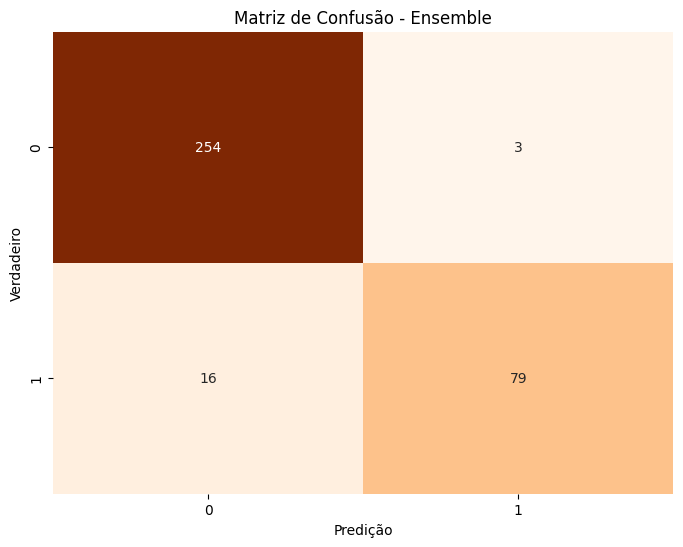

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       257
           1       0.96      0.83      0.89        95

    accuracy                           0.95       352
   macro avg       0.95      0.91      0.93       352
weighted avg       0.95      0.95      0.94       352



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


y_pred_final = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_final)
print("Acurácia do Ensemble:", accuracy)

f1_macro = f1_score(y_test, y_pred_final, average='macro')
print("F1-Score Macro do Ensemble:", f1_macro)

conf_matrix = confusion_matrix(y_test, y_pred_final)
print("Matriz de Confusão do Ensemble:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Ensemble")
plt.show()

print("Relatório de Classificação:\n", classification_report(y_test, y_pred_final))


Resultados e Impacto das Técnicas Utilizadas
1-Técnicas de Balanceamento (SMOTE)
Como os dados de fraudes representam uma pequena fração do total, o SMOTE foi aplicado para gerar novas amostras sintéticas da classe minoritária, aumentando assim o número de fraudes no conjunto de treinamento.
Isso ajudou o modelo a ver mais exemplos de fraudes durante o treinamento, melhorando o recall para essa classe, ou seja, sua capacidade de identificar fraudes corretamente.
O impacto foi especialmente positivo na F1-Score Macro, que aumentou ao melhorar o equilíbrio entre precisão e recall entre as classes.

2-Seleção de Atributos (Feature Selection)
Com SelectKBest usando a função mutual_info_classif, selecionamos os 10 atributos mais informativos, reduzindo a complexidade do modelo e aumentando a interpretabilidade.
Esse passo reduziu o ruído e ajudou a evitar o overfitting, já que o modelo se concentrou apenas nos atributos mais relevantes para detectar fraudes.

3-Tuning de Hiperparâmetros
Com GridSearchCV, otimizamos os parâmetros do RandomForestClassifier no pipeline de treinamento. Isso melhorou o desempenho ao encontrar combinações ideais de profundidade, número de árvores, e critério de divisão.
Essas otimizações permitiram que o modelo fosse suficientemente complexo para capturar os padrões sem ser excessivamente ajustado ao conjunto de dados de treino, o que foi refletido em melhores métricas no conjunto de teste.

4-Ensemble de Modelos
Combinamos RandomForest, SVM e KNN em um Voting Classifier para aumentar a robustez. Essa técnica permitiu que diferentes modelos contribuíssem com seus pontos fortes.
A abordagem de votação aumentou a precisão do modelo final, equilibrando os erros entre as classes, o que também foi refletido em uma melhoria na F1-Score Macro.

Conclusão
As técnicas de SMOTE e Ensemble tiveram um impacto significativo no desempenho geral. A adição de amostras sintéticas da classe minoritária fez com que o modelo final fosse mais capaz de identificar fraudes, enquanto o ensemble equilibrava a influência dos erros. A F1-Score Macro e a Matriz de Confusão mostraram um melhor desempenho com essas técnicas aplicadas, garantindo que o modelo fosse mais eficaz em um cenário de dados desbalanceados.